In [33]:
!python mmdetection/tools/train.py CascadeTabNet/Config/new_config.py

Training Started
08/13 16:42:03 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1634574429
    GPU 0: NVIDIA A30
    CUDA_HOME: None
    GCC: gcc (GCC) 12.3.0
    PyTorch: 2.3.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.3.6 (Git Hash 86e6af5974177e513fd3fee58425e1063e7f1361)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=comput

In [1]:
import torch
print(torch.cuda.is_available())

True


In [2]:
%cd MTP

/csehome/m23csa016/MTP


/csehome/m23csa016/.conda/envs/pyten/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [11]:
import os
xmlfiles = os.listdir("/scratch/m23csa016/tabdet_data/Orig_Annotations")
print(len(xmlfiles))

1934


In [16]:
import numpy as np
xmlfiles = np.array(xmlfiles)
print(len(np.unique(xmlfiles)))

1934


In [17]:
import random 
tr_split = int(0.1 * len(xmlfiles))
random.shuffle(xmlfiles)

test = xmlfiles[:tr_split]
train = xmlfiles[tr_split:]
print(len(test), len(train))

193 1741


In [18]:
import sys
sys.path.append("/csehome/m23csa016/MTP")
from CascadeTabNet.DataPreparation.generateVOC2JSON import generateVOC2Json
save_path = "/scratch/m23csa016/tabdet_data/Annotations"
generateVOC2Json(train, save_path, "train_90")

File Name: cTDaR_t10167.xml and image_id 1
File Name: 92_23.xml and image_id 2
File Name: 9537_038.xml and image_id 3
File Name: 73_202.xml and image_id 4
File Name: cTDaR_t10032.xml and image_id 5
File Name: 10.1.1.8.2160_6.xml and image_id 6
File Name: 10.1.1.30.3567_5.xml and image_id 7
File Name: 2092_068.xml and image_id 8
File Name: cTDaR_t10331.xml and image_id 9
File Name: cTDaR_t10532.xml and image_id 10
File Name: 60_100.xml and image_id 11
File Name: cTDaR_t10013.xml and image_id 12
File Name: cTDaR_t10370.xml and image_id 13
File Name: 1194_021.xml and image_id 14
File Name: 30_210.xml and image_id 15
File Name: 10.1.1.1.2030_4.xml and image_id 16
File Name: cTDaR_t10123.xml and image_id 17
File Name: 10.1.1.35.2056_3.xml and image_id 18
File Name: 10.1.1.160.507_10.xml and image_id 19
File Name: 54_55.xml and image_id 20
File Name: 31_132.xml and image_id 21
File Name: 10.1.1.6.2277_10.xml and image_id 22
File Name: 9503_027.xml and image_id 23
File Name: 10.1.1.1.2013_63.

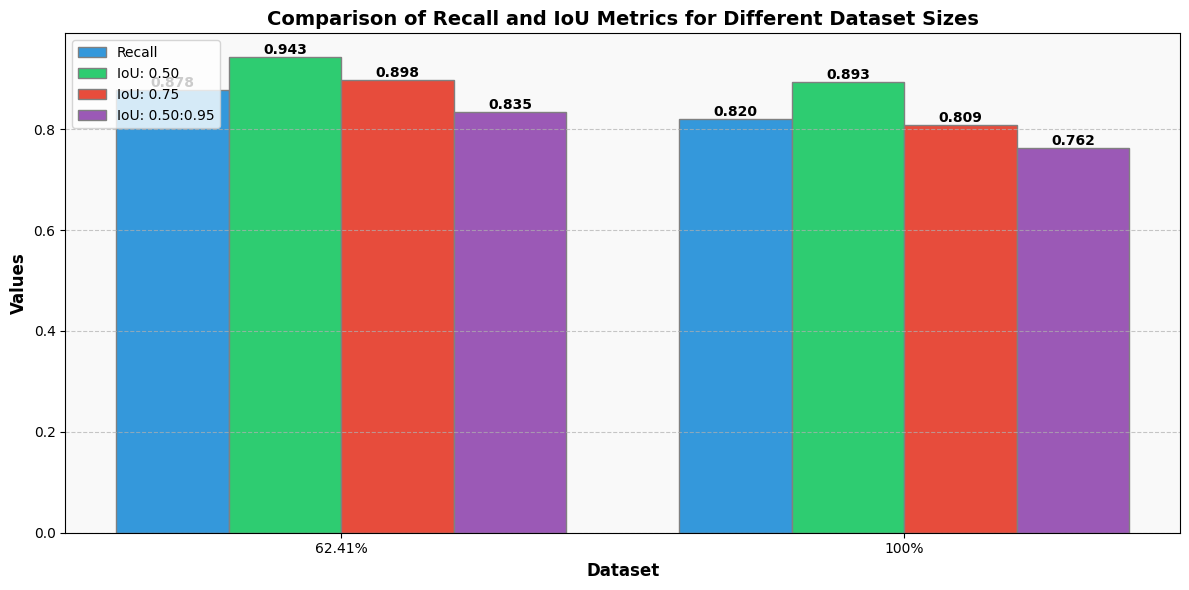

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Data
datasets = ['62.41%', '100%']
recall = [0.878, 0.820]
iou_50 = [0.943, 0.893]
iou_75 = [0.898, 0.809]
iou_5095 = [0.835, 0.762]

# Bar width
bar_width = 0.2

# Bar positions
r1 = np.arange(len(datasets))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting
plt.figure(figsize=(12, 6))

bars1 = plt.bar(r1, recall, color='#3498db', width=bar_width, edgecolor='grey', label='Recall')
bars2 = plt.bar(r2, iou_50, color='#2ecc71', width=bar_width, edgecolor='grey', label='IoU: 0.50')
bars3 = plt.bar(r3, iou_75, color='#e74c3c', width=bar_width, edgecolor='grey', label='IoU: 0.75')
bars4 = plt.bar(r4, iou_5095, color='#9b59b6', width=bar_width, edgecolor='grey', label='IoU: 0.50:0.95')

# Adding labels to each bin
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Apply labels
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Adding labels
plt.xlabel('Dataset', fontweight='bold', fontsize=12)
plt.ylabel('Values', fontweight='bold', fontsize=12)
plt.xticks([r + bar_width*1.5 for r in range(len(datasets))], datasets)

# Title and legend
plt.title('Comparison of Recall and IoU Metrics for Different Dataset Sizes', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)

# Stylish grid and design elements
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')

# Tight layout to fit everything nicely
plt.tight_layout()

# Show plot
plt.show()


In [3]:
!python mmdetection/tools/test.py CascadeTabNet/Config/config_100.py /scratch/m23csa016/tabdet_data/Checkpoints/Original/train_100/epoch_100.pth --work-dir CascadeTabNet/evaluations/Original/

09/09 11:39:40 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 1371454838
    GPU 0: NVIDIA A30
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.2, V12.2.91
    GCC: gcc (GCC) 12.3.0
    PyTorch: 2.3.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.3.6 (Git Hash 86e6af5974177e513fd3fee58425e1063e7f1361)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-genc

In [4]:
%cd MTP

/csehome/m23csa016/MTP


/csehome/m23csa016/.conda/envs/pyten/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
from mmdet.apis import DetInferencer

# Initialize the DetInferencer
inferencer = DetInferencer(model='CascadeTabNet/Config/new_config.py', weights='/csehome/m23csa016/MTP/work_dirs/new_config/epoch_64.pth')

# Perform inference
bbox = inferencer('/csehome/m23csa016/largepreview.png', out_dir='CascadeTabNet/testres', no_save_pred=False)

In [3]:
%cd ..

/csehome/m23csa016/MTP


/csehome/m23csa016/.conda/envs/pyten/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
%cd ..

/csehome/m23csa016/MTP


/csehome/m23csa016/.conda/envs/pyten/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import json
import os
from mmdet.apis import DetInferencer

# Paths
# Specify the path to model config and checkpoint file
data_root = "/scratch/m23csa016/tabdet_data"
config_path = 'CascadeTabNet/Config'
checkpoint_path = 'CascadeTabNet/Checkpoints'

image_folder = os.path.join(data_root, "Orig_Image")  # Single folder for all images
test_annotation_file = os.path.join(data_root, "Annotations/test.json")  # Test annotation file path
output_dir = 'CascadeTabNet/testres'

for p in [40]:
    config_file = os.path.join(config_path, f"config_{p}.py")
    checkpoint_file = os.path.join(checkpoint_path, f"Data_{p}/train_{p}/epoch_200.pth")

    out_dir = os.path.join(output_dir, f'data_{p}/end2end')
    os.makedirs(out_dir, exist_ok=True)

    pred_dir = os.path.join(out_dir, "preds")
    os.makedirs(pred_dir, exist_ok=True)

    # Initialize the DetInferencer
    inferencer = DetInferencer(model=config_file, weights=checkpoint_file)
    # Load test annotations
    with open(test_annotation_file) as f:
        test_annotations = json.load(f)

    # Get test image filenames
    test_image_filenames = [img['file_name'] for img in test_annotations['images']]

    # Run inference and save results
    for img_filename in test_image_filenames:
        img_path = os.path.join(image_folder, img_filename)
        
        # Perform inference
        result = inferencer(img_path, out_dir=out_dir)

        # Process the result to the desired format
        output = []
        # Extracting labels, scores, and bboxes
        if len(result['predictions'][0]['labels']) != 0:
            label = result['predictions'][0]['labels'][0]
        else:
            label = -1
        
        if len(result['predictions'][0]['scores']) != 0:
            score = result['predictions'][0]['scores'][0]           
        else:
            score = 0

        if len(result['predictions'][0]['bboxes']) != 0:
            bbox = result['predictions'][0]['bboxes'][0]
        else:
            bbox = [-1, -1, -1, -1]

        x_min, y_min, x_max, y_max = bbox[0], bbox[1], bbox[2], bbox[3]

        output.append(f"{label} {score:.4f} {x_min:.2f} {y_min:.2f} {x_max:.2f} {y_max:.2f}")

        # Keep track of correctly detected tables
        if score < 0.95:
            with open(f"{out_dir}/undetected.txt", 'a+') as f:
                f.write(f"-1 {score:.4f} {img_filename}\n")
        
        else:
            with open(f"{out_dir}/detected.txt", 'a+') as f:
                f.write(f"0 {score:.4f} {img_filename}\n")
        
        # Save the results to a file
        with open(f"{pred_dir}/{img_filename}.txt", 'w') as f:
            f.write("\n".join(output))


In [3]:
%cd ..

/csehome/m23csa016/MTP


/csehome/m23csa016/.conda/envs/pyten/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [8]:
!python mmdetection/tools/analysis_tools/analyze_logs.py plot_curve CascadeTabNet/work_dirs/new_config/20240816_192104/vis_data/20240816_192104.json --keys s0.acc s1.acc s2.acc --legend s0.acc s1.acc s2.acc --out CascadeTabNet/evaluations/Dilated/plots/accuracy.pdf

plot curve of CascadeTabNet/work_dirs/new_config/20240816_192104/vis_data/20240816_192104.json, metric is s0.acc
plot curve of CascadeTabNet/work_dirs/new_config/20240816_192104/vis_data/20240816_192104.json, metric is s1.acc
plot curve of CascadeTabNet/work_dirs/new_config/20240816_192104/vis_data/20240816_192104.json, metric is s2.acc
save curve to: CascadeTabNet/evaluations/Dilated/plots/accuracy.pdf


In [ ]:
import os

def remove_prefix_from_filenames(directory, prefix):
    for filename in os.listdir(directory):
        if filename.startswith(prefix):
            new_filename = filename[len(prefix):]
            old_file_path = os.path.join(directory, filename)
            new_file_path = os.path.join(directory, new_filename)
            os.rename(old_file_path, new_file_path)
            print(f'Renamed: {old_file_path} -> {new_file_path}')

# Example usage
directory = '/scratch/m23csa016/tabdet_data/Smudged'
prefix = 'Smudge_'
remove_prefix_from_filenames(directory, prefix)


In [15]:
import json
import os
import random

def create_subset_json(input_json_path, output_json_path, subset_percentage):
    # Load the original JSON file
    with open(input_json_path, 'r') as f:
        data = json.load(f)
    
    # Calculate the number of images and annotations to include in the subset
    total_images = len(data['images'])
    subset_size = int(total_images * subset_percentage / 100)
    
    # Randomly select a subset of images
    subset_images = random.sample(data['images'], subset_size)
    subset_image_ids = set([image['id'] for image in subset_images])
    
    # Filter annotations that correspond to the selected images
    subset_annotations = [anno for anno in data['annotations'] if anno['image_id'] in subset_image_ids]
    
    # Create the subset JSON structure
    subset_data = {
        'images': subset_images,
        'annotations': subset_annotations,
        'categories': data['categories']
    }
    
    # Save the subset JSON to a new file
    with open(output_json_path, 'w') as f:
        json.dump(subset_data, f, indent=4)

# Example usage:

# create_subset('train.json', 'train_15.json', 15)
# create_subset('train.json', 'train_20.json', 20)

Subset JSON file created: train_10.json


In [17]:
data_root = "/scratch/m23csa016/tabdet_data/Annotations/"

In [ ]:
percentages = [10, 15, 20, 25, 30, 40]

for per in percentages:
    create_subset_json(os.path.join(data_root, 'train.json'), os.path.join(data_root, f'train_{per}.json'), per)   

In [22]:
import os
import json

def update_config(config_path, percentage, subset_json_path, checkpoint_dir):
    with open(config_path, 'r') as file:
        config_data = file.read()

    config_data = config_data.replace("Annotations/train.json", f'Annotations/train_{percentage}.json')
    
    # Update the checkpoint file path
    checkpoint_path = os.path.join(checkpoint_dir, f'Data_{percentage}')
    os.makedirs(checkpoint_path, exist_ok=True)

    config_data = config_data.replace("out_dir='/csehome/m23csa016/MTP/CascadeTabNet/Checkpoints/Orig_Image'", f"out_dir='{checkpoint_path}'")
    
    # Write the updated config to a new file
    new_config_path = os.path.join("/csehome/m23csa016/MTP/CascadeTabNet/Config", f'config_{percentage}.py')
    with open(new_config_path, 'w') as file:
        file.write(config_data)
    
    return new_config_path

config_path = 'CascadeTabNet/Config/new_config.py'
subset_json_path = '/scratch/m23csa016/tabdet_data/Annotations'
checkpoint_dir = '/csehome/m23csa016/MTP/CascadeTabNet/Checkpoints'

for percentage in [10, 15, 20, 25, 30, 40]:
    new_config_path = update_config(config_path, percentage, subset_json_path, checkpoint_dir)

In [21]:
work_dir = "/csehome/m23csa016/MTP/CascadeTabNet/work_dirs"

for p in [10, 15, 20, 25, 30, 40]:
    os.makedirs(os.path.join(work_dir, f'train_{p}'))

In [12]:
xmlfiles = os.listdir("/scratch/m23csa016/tabdet_data/Orig_Annotations")
print(xmlfiles[:5])

['98_214.xml', '97_95.xml', '98_141.xml', '9_81.xml', '98_143.xml']


In [15]:
import random
# Shuffle the list to randomize the order
random.shuffle(xmlfiles)

# Calculate the split point for 30-70 ratio
split_index = int(0.7 * len(xmlfiles))

# Split into train and test sets
test_files = xmlfiles[:split_index]  # 70% for testing
train_files = xmlfiles[split_index:]   # 30% for training

In [16]:
## Script for Converting Pascal VOC annotations to Coco Json format
## This script shows and example conversion of our table dataset pascal voc
## annotations conversion to coco annotations  

## Usage :
# You need to first create a txt file containing names of all pascal voc files
# You can use following linux command
# ls -1 | sed -e 's/\.xml$//' | sort -n > "/path/to/folder/coco.txt"
# And then read the comments in this script to understand its working

import os
import xml.etree.ElementTree as ET
import xmltodict
import json
from xml.dom import minidom
from collections import OrderedDict

def generateVOC2Json(rootDir,xmlFiles):
  attrDict = dict()
  # Add categories according to you Pascal VOC annotations
  attrDict["categories"]=[{"supercategory":"none","id":1,"name":"Table"}]
  images = list()
  annotations = list()
  id1 = 1

  # Some random variables
  cnt_bor = 0
  cnt_cell = 0
  cnt_bless = 0

  # Main execution loop
  for root, dirs, files in os.walk(rootDir):
    image_id = 0
    for file in xmlFiles:
      image_id = image_id + 1
      if file in files:
        annotation_path = os.path.abspath(os.path.join(root, file))
        image = dict()
        doc = xmltodict.parse(open(annotation_path).read())
        image['file_name'] = str(doc['annotation']['filename'])
        image['height'] = int(doc['annotation']['size']['height'])
        image['width'] = int(doc['annotation']['size']['width'])
        image['id'] = image_id
        print("File Name: {} and image_id {}".format(file, image_id))
        images.append(image)
        if 'object' in doc['annotation']:
          for key,vals in doc['annotation'].items():
            if(key=='object'):
              for value in attrDict["categories"]:
                if(not isinstance(vals, list)):
                  vals = [vals]
                for val in vals:
                  if str(val['name']).lower() == str(value["name"]).lower():
                    annotation = dict()
                    annotation["iscrowd"] = 0
                    annotation["image_id"] = image_id
                    x1 = int(val["bndbox"]["xmin"])  - 1
                    y1 = int(val["bndbox"]["ymin"]) - 1
                    x2 = int(val["bndbox"]["xmax"]) - x1
                    y2 = int(val["bndbox"]["ymax"]) - y1
                    annotation["bbox"] = [x1, y1, x2, y2]
                    annotation["area"] = float(x2 * y2)
                    annotation["category_id"] = value["id"]

                    # Tracking the count
                    if(value["id"] == 1):
                      cnt_bor += 1
                    if(value["id"] == 2):
                      cnt_cell += 1
                    if(value["id"] == 3):
                      cnt_bless += 1

                    annotation["ignore"] = 0
                    annotation["id"] = id1
                    annotation["segmentation"] = [[x1,y1,x1,(y1 + y2), (x1 + x2), (y1 + y2), (x1 + x2), y1]]
                    id1 +=1
                    annotations.append(annotation)
        else:
          print("File: {} doesn't have any object".format(file))
      else:
        print("File: {} not found".format(file))

  attrDict["images"] = images	
  attrDict["annotations"] = annotations
  attrDict["type"] = "instances"

  # Printing out some statistics
  print(len(images))
  print("Bordered : ",cnt_bor," Cell : ",cnt_cell," Bless : ",cnt_bless)
  print(len(annotations))

  # Save the final JSON file
  # jsonString = json.dumps(attrDict)
  jsonString = json.dumps(attrDict, indent = 4, sort_keys=True)
  with open("train.json", "w") as f:
    f.write(jsonString)

# Path to the pascal voc xml files 
rootDir = "/scratch/m23csa016/tabdet_data/Orig_Annotations"

# Start execution
generateVOC2Json(rootDir, train_files)


File Name: 97_207.xml and image_id 1
File Name: 10_261.xml and image_id 2
File Name: 10.1.1.100.2013_22.xml and image_id 3
File Name: 10.1.1.6.2249_15.xml and image_id 4
File Name: 10.1.1.6.2352_5.xml and image_id 5
File Name: 10.1.1.1.2094_3.xml and image_id 6
File Name: cTDaR_t10509.xml and image_id 7
File Name: 9561_044.xml and image_id 8
File Name: 5373_008.xml and image_id 9
File Name: 9569_024.xml and image_id 10
File Name: 77_133.xml and image_id 11
File Name: 0212_175.xml and image_id 12
File Name: 9571_020.xml and image_id 13
File Name: cTDaR_t10466.xml and image_id 14
File Name: cTDaR_t10246.xml and image_id 15
File Name: 9508_056.xml and image_id 16
File Name: 44_292.xml and image_id 17
File Name: 10.1.1.160.552_20.xml and image_id 18
File Name: 10.1.1.1.2100_9.xml and image_id 19
File Name: 43_106.xml and image_id 20
File Name: 44_287.xml and image_id 21
File Name: cTDaR_t10593.xml and image_id 22
File Name: 39_25.xml and image_id 23
File Name: 10.1.1.190.1811_2.xml and ima

In [1]:
import torch
print(torch.cuda.is_available())

True


In [2]:
!pwd

/csehome/m23csa016/MTP/CascadeTabNet


In [20]:
!python training.py

File Name: cTDaR_t10544.xml and image_id 1
File Name: cTDaR_t10552.xml and image_id 2
File Name: cTDaR_t10406.xml and image_id 3
File Name: 77_289.xml and image_id 4
File Name: 81_72.xml and image_id 5
File Name: cTDaR_t10036.xml and image_id 6
File Name: 80_286.xml and image_id 7
File Name: cTDaR_t10384.xml and image_id 8
File Name: 10.1.1.32.4629_8.xml and image_id 9
File Name: 10.1.1.7.2172_4.xml and image_id 10
File Name: 5625_015.xml and image_id 11
File Name: 4_289.xml and image_id 12
File Name: 0151_208.xml and image_id 13
File Name: cTDaR_t10113.xml and image_id 14
File Name: 10.1.1.34.330_9.xml and image_id 15
File Name: 59_151.xml and image_id 16
File Name: 10.1.1.1.2063_21.xml and image_id 17
File Name: cTDaR_t10290.xml and image_id 18
File Name: 10.1.1.120.1615_3.xml and image_id 19
File Name: 10.1.1.32.6167_3.xml and image_id 20
File Name: 10.1.1.160.614_2.xml and image_id 21
File Name: 10.1.1.6.2255_4.xml and image_id 22
File Name: 88_219.xml and image_id 23
File Name: cT

In [17]:
!pwd

/csehome/m23csa016/MTP/CascadeTabNet


In [18]:
import os

def create_list(filename):
    with open(filename, 'r') as file:
            content = file.readlines()
    # Strip newline characters from each line
    content = [line.strip() for line in content]

    return content

test_files = create_list('t_xmls.txt')
train_files = create_list('tr_xmls.txt')
undetected_xmls = create_list("undet_xmls.txt")

train_files.extend(undetected_xmls)

for xml in undetected_xmls:
    test_files.remove(xml)

In [19]:
print(train_files, test_files)

['1.xml', '2.xml', '3.xml', '4.xml'] ['5.xml', '6.xml', '7.xml']
